In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

def resize_images(image_dir, target_size, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    resized_images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpeg"):
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, target_size)
                resized_img_path = os.path.join(output_dir, filename)
                cv2.imwrite(resized_img_path, resized_img)
                resized_images.append(resized_img)
                labels.append(1)
            else:
                print(f"Warning: {filename} cannot be loaded.")
    print(f"Total resized images: {len(resized_images)}")
    return np.array(resized_images), np.array(labels)

# Menentukan direktori gambar dan ukuran target
image_dir = '/content/gdrive/My Drive/sawit_img'
target_size = (100, 100)
output_dir = '/content/gdrive/My Drive/sawit_img_resized/'

# Mengubah dimensi semua gambar menjadi target_size dan menyimpannya ke dalam folder baru
resized_images, labels = resize_images(image_dir, target_size, output_dir)

# Pembagian dataset menjadi data latih dan data uji
train_images, test_images, train_labels, test_labels = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

# Fungsi untuk membangun model CNN sederhana
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer untuk masalah regresi
    ])
    return model

# Membangun model
input_shape = train_images.shape[1:]
model = build_model(input_shape)
model.summary()

# Mengompilasi model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Karena ini adalah masalah regresi
              metrics=['mae'])  # Menggunakan Mean Absolute Error sebagai metrik evaluasi

# Pelatihan model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Simpan model setelah pelatihan
model.save('sawit_count_model.h5')

# Evaluasi model (opsional)
loss, mae = model.evaluate(test_images, test_labels)
print("Test MAE:", mae)



Total resized images: 46
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 flatten_4 (Flatten)         

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Memuat model yang telah dilatih
model = tf.keras.models.load_model('sawit_count_model.h5')

# Lokasi file gambar perkebunan sawit yang ingin diuji
image_path = '/content/gdrive/My Drive/sawit_img/image.jpg'

# Membaca gambar
img = cv2.imread(image_path)

# Mengubah ukuran gambar
resized_img = cv2.resize(img, (100, 100))  # Mengubah ukuran menjadi 100 x 100

# Memperluas dimensi agar sesuai dengan input model
input_img = np.expand_dims(resized_img, axis=0)

# Melakukan prediksi jumlah tanaman sawit dalam gambar
predicted_count = model.predict(input_img)
print("Predicted plant count:", predicted_count[0][0])


1/1 [==============================] - 0s 74ms/step
Predicted plant count: 3.5951004


1/1 [==============================] - 0s 114ms/step
Predicted plant count: 3


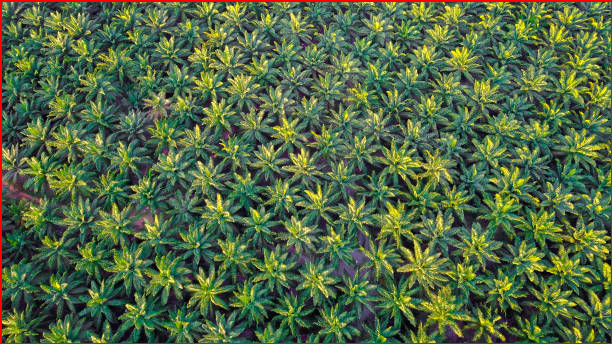

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Memuat model yang telah dilatih
model = tf.keras.models.load_model('sawit_count_model.h5')

# Lokasi file gambar perkebunan sawit yang ingin diuji
image_path = '/content/gdrive/My Drive/sawit_img/image.jpg'

# Membaca gambar
img = cv2.imread(image_path)

# Mengubah ukuran gambar
resized_img = cv2.resize(img, (100, 100))  # Mengubah ukuran menjadi 100 x 100

# Memperluas dimensi agar sesuai dengan input model
input_img = np.expand_dims(resized_img, axis=0)

# Melakukan prediksi jumlah tanaman sawit dalam gambar
predicted_count = model.predict(input_img)

# Menampilkan jumlah tanaman sawit yang diprediksi
print("Predicted plant count:", int(predicted_count[0][0]))

# Threshold untuk menandai tanaman sawit
threshold = 0.5

# Menggambarkan kotak di sekitar area yang dianggap sawit
if predicted_count > threshold:  # Jika model memprediksi ada tanaman sawit
    cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 255), 2)  # Membuat kotak merah di seluruh gambar

# Menampilkan gambar dengan kotak
cv2_imshow(img)
